In [4]:
# .pkl to .json converter
import pickle
import json

def convert_pkl_to_json(pkl_file, json_file):
    try:
        with open(pkl_file, 'rb') as f:
            data = pickle.load(f)
        
        with open(json_file, 'w') as f:
            json.dump(data, f, indent=4)
        
        print(f"Successfully converted {pkl_file} to {json_file}")
    except Exception as e:
        print(f"Error converting {pkl_file} to {json_file}: {e}")

pkl_file = "../../v2/results/benchmark_results.pkl"
json_file = "../../v2/results/benchmark_results.json"
convert_pkl_to_json(pkl_file, json_file)

Successfully converted ../../v2/results/benchmark_results.pkl to ../../v2/results/benchmark_results.json


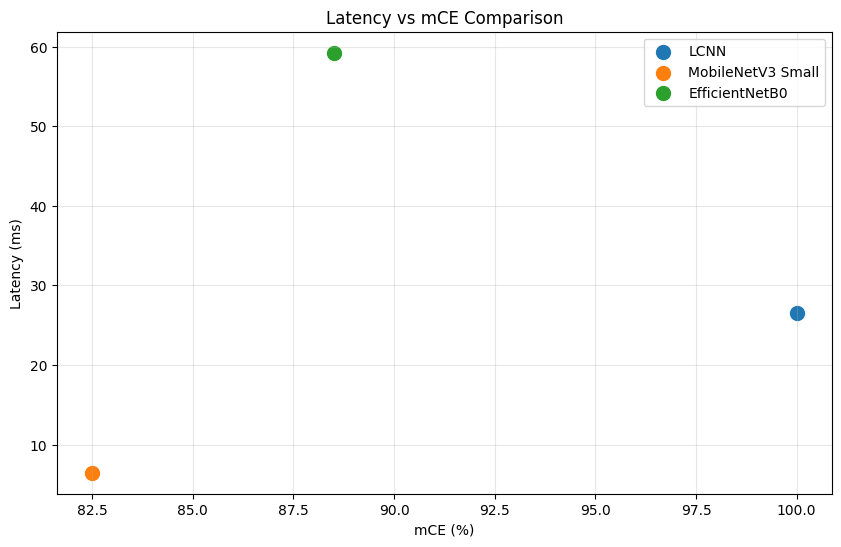

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Read the benchmark results
with open('../../v2/results/benchmark_results.json', 'r') as f:
    benchmark_data = json.load(f)

# Read the MCE data from Excel
mce_data = pd.read_excel('../../v2/results/mce/tabela_mce.xlsx')

# Extract the model statistics (first element of the list)
model_stats = benchmark_data[0]

# Create a DataFrame for latency data
latency_df = pd.DataFrame(model_stats)

# Create the plot
plt.figure(figsize=(10, 6))

# Mapeamento dos nomes dos modelos (nome no JSON -> nome para exibição)
model_mapping = {
    'LCNN': 'LCNN',
    'MobileNetV3': 'MobileNetV3 Small',
    'EfficientNetB0': 'EfficientNetB0'
}

# Mapeamento para busca no Excel
excel_mapping = {
    'LCNN': 'LCNN',
    'MobileNetV3': 'MobileNetV3',
    'EfficientNetB0': 'EfficientNet'
}

# Plot each model
for model_json, model_excel in excel_mapping.items():
    # Get latency data
    model_latency_value = latency_df[latency_df['model_name'] == model_json]['mean_ms'].values[0]
    
    # Get MCE data
    model_mce_value = mce_data[mce_data['Network'] == model_excel]['mCE'].values[0]
    
    # Use o nome de exibição do model_mapping para a legenda
    plt.scatter(model_mce_value, model_latency_value, label=model_mapping[model_json], s=100)

plt.xlabel('mCE (%)')
plt.ylabel('Latency (ms)')
plt.title('Latency vs mCE Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Save the plot
plt.savefig('../../v2/results/latency_vs_mce.png', dpi=300, bbox_inches='tight')
plt.show()